# Task 1

[imread in matplotlib](https://github.com/matplotlib/matplotlib/blob/v3.9.3/lib/matplotlib/image.py#L1472-L1547) states that we should use PIL.Image.Open instead. This is the [link](https://pillow.readthedocs.io/en/stable/reference/Image.html) to Pillow Image Open.


The goal for this task is to write a function to open a [PGM image file](https://user-web-p-u02.wpi.edu/~cfurlong/me-593n/pgmimage.html).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Example Open Image code Pillow

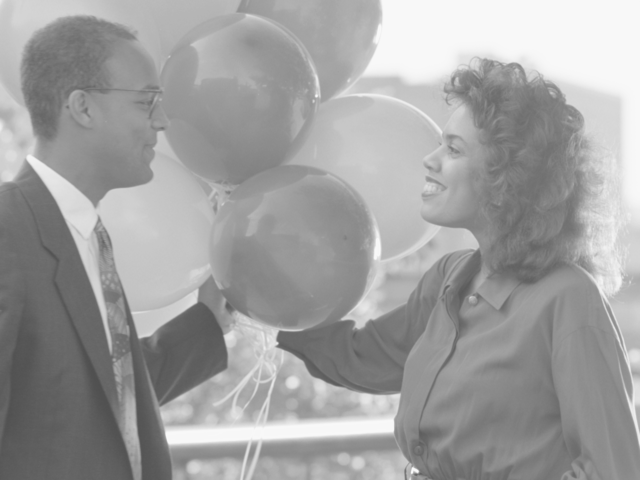

<PIL.PpmImagePlugin.PpmImageFile image mode=L size=640x480 at 0x103711760>


In [84]:
# Example code that I want to imitate
with Image.open("example.ascii.pgm") as im:
    display(im)
    print(im)

## Test: Plot grayscale value on nd array

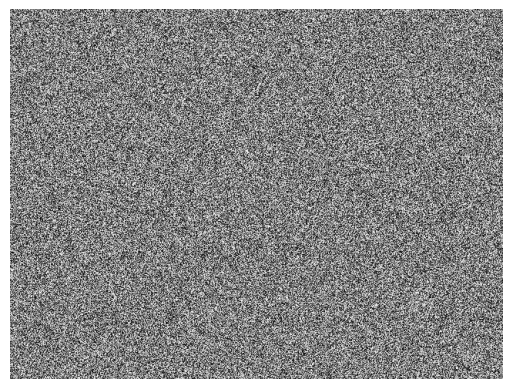

In [85]:

# Create a random array with size 480 x 640
nrow = 480
ncol = 640

a = np.random.choice(255, nrow*ncol).reshape(nrow,ncol)
a.shape

# Create a square image filled with grayscale value 232
grayscale_value = a / 255  # Normalize to the range [0, 1]
image = np.full((nrow, ncol), grayscale_value)  # 100x100 pixels box

# Display the image
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')  # Hide axes
plt.show()

In [86]:
print(image)

[[0.66666667 0.42352941 0.25098039 ... 0.41176471 0.69411765 0.69411765]
 [0.27058824 0.91764706 0.11372549 ... 0.54509804 0.87843137 0.75686275]
 [0.05882353 0.51764706 0.71372549 ... 0.92156863 0.23921569 0.48627451]
 ...
 [0.46666667 0.91764706 0.61568627 ... 0.38039216 0.83921569 0.11372549]
 [0.08627451 0.08627451 0.2745098  ... 0.14901961 0.57254902 0.68235294]
 [0.47058824 0.30588235 0.22745098 ... 0.42745098 0.70980392 0.83529412]]


## Read data and plot from example image

P2


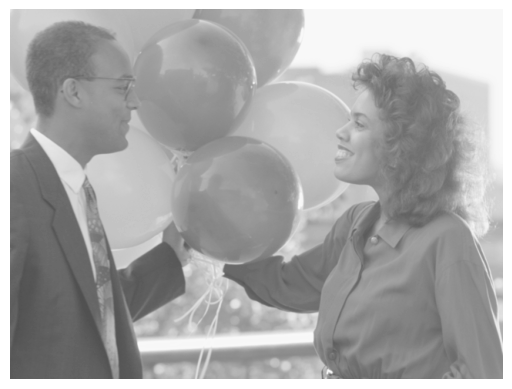

In [ ]:
with open('example.ascii.pgm') as f:
    # Check First line
    # which is the signature of the image file and PGM file format identification
    magic_number = f.readline().rstrip('\n')
    print(magic_number)
    if (magic_number != 'P5') and (magic_number != 'P2'):
        # TODO: raise error if the image is not PGM
        print('Not a PGM file')
    
    # Skip second line
    next(f)

    # Get the number of columns and rows of the data
    shape = f.readline().rstrip('\n').split(" ")
    num_rows = int(shape[1])
    num_columns = int(shape[0])

    # Get maximum grey level specify in the image
    max_grey_level = int(f.readline().rstrip('\n'))


    # Get the stored data
    pgm_info = []
    pgm_info = [int(data.strip("\n")) for data in f.read().split(" ") if data.strip("\n")]

    # Convert the list to a NumPy array and reshape
    pic = np.array(pgm_info, dtype=int).reshape(num_rows, num_columns)
        

# Create an image with that grayscale value
## TODO: Check why I need to normalize data in order to show
grayscale_value = pic / max_grey_level  # Normalize to the range [0, 1]
image = np.full((num_rows, num_columns), grayscale_value)

# Display the image
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()
